<a href="https://colab.research.google.com/github/mirinai/BigdataPhysics_practice/blob/main/week_7_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

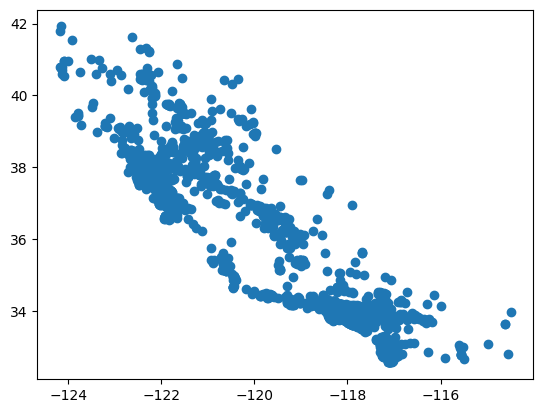

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
house=pd.read_csv('/content/sample_data/california_housing_test.csv')
x=house['longitude']
y=house['latitude']
plt.scatter(x,y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def initial_centroid(k,x,y):
  index=np.random.choice(np.arange(len(x)),k,replace=False)
  return np.array([x[index],y[index]])

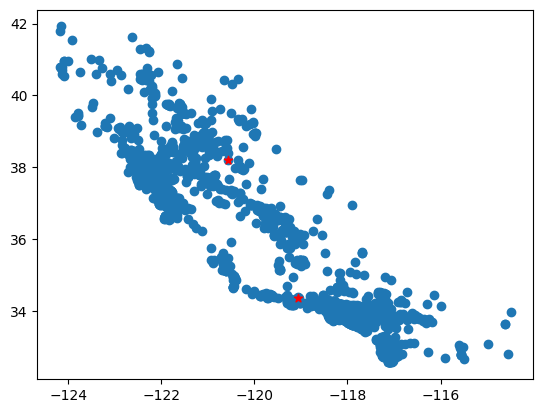

In [ ]:
k=2
center=initial_centroid(k,x,y)
plt.scatter(x,y)
plt.scatter(center[0][0],center[1][0],c='r',marker='*')
plt.scatter(center[0][1],center[1][1],c='r',marker='*')

In [ ]:
def clustering(k,x,y,centroid):
  ds=np.zeros([k,len(x)])
  for i in range(k):
    x_center=centroid[0][i]
    y_center=centroid[1][i]
    ds[i]=np.sqrt((x-x_center)**2+(y-y_center)**2)
  return np.argmin(ds,axis=0)

(array([1025.,    0.,    0.,  426.,    0.,    0.,  471.,    0.,    0.,
        1078.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

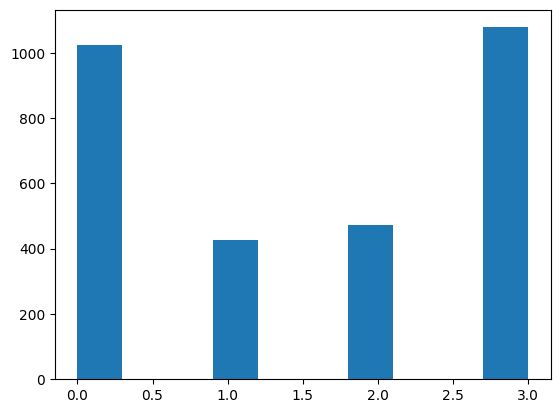

In [ ]:
k=4
d=clustering(k,x,y,initial_centroid(k,x,y))
plt.hist(d)

In [ ]:
def move_center(k,x,y,cluster):
  new_clust=np.zeros([2,k])
  for i in range(k):
    new_x,new_y=np.mean(x[cluster==i]), np.mean(y[cluster==i])
    new_clust[0,i]=new_x
    new_clust[1,i]=new_y
  return new_clust

In [ ]:
c=initial_centroid(k,x,y)
d=clustering(k,x,y,c)
print(c)
c=move_center(k,x,y,d)
print(c)
d=clustering(k,x,y,c)

[[-116.89 -117.69 -118.22 -118.12]
 [  33.79   34.04   33.99   33.85]]
[[-116.98075235 -117.60995984 -120.44805293 -118.03094937]
 [  33.07398119   34.04919679   36.48032136   33.81316456]]


In [ ]:
def plot(x,y,d,center):
  plt.scatter(x,y,c=d,cmap='Set2',alpha=0.5)
  for i in range(len(center[0])):
    plt.scatter(center[0][i],center[1][i],c='r',marker='*',s=100)
  plt.show()

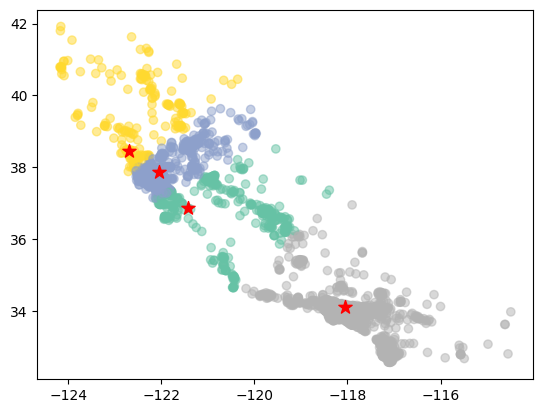

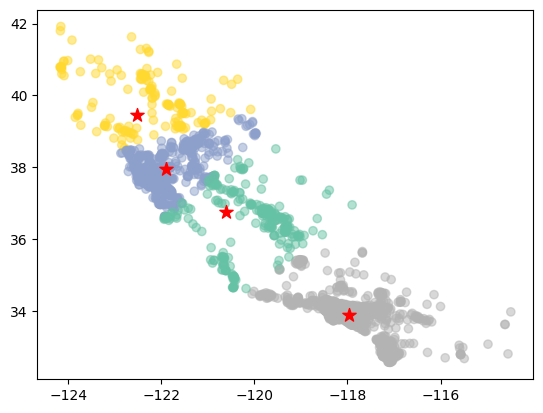

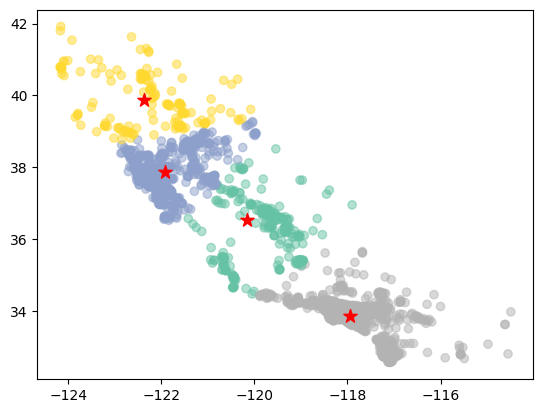

In [ ]:
c=initial_centroid(k,x,y)
d=clustering(k,x,y,c)
plot(x,y,d,c)

c=move_center(k,x,y,d)
d=clustering(k,x,y,c)
plot(x,y,d,c)

c=move_center(k,x,y,d)
d=clustering(k,x,y,c)
plot(x,y,d,c)